In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/My Drive/DeepLearning_Simili/Projects/Deep Learning with Keras/loan_dataset/loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Exploratory Data Analysis¶
Usin Seaborn and pandas to visualize the dataset. Firsty we create a histogram for fico: The FICO credit score of the borrower.

Text(0.5, 0, 'FICO')

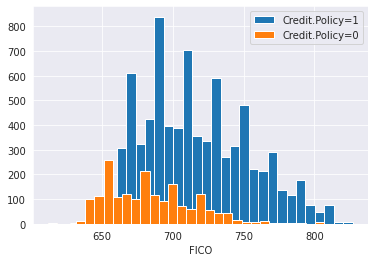

In [ ]:
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Using matplotlib to better visualization 

Text(0.5, 0, 'FICO')

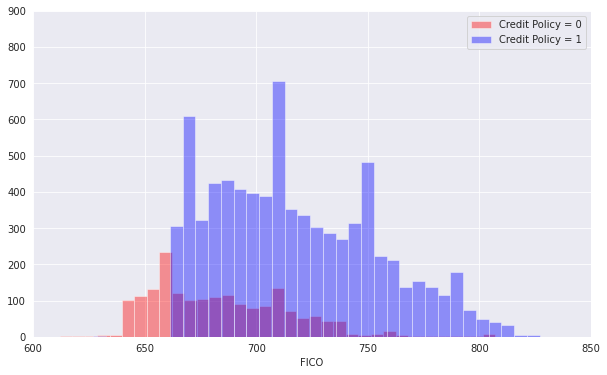

In [ ]:
plt.subplots(figsize = (10,6))
sns.distplot(df[df['credit.policy'] == 0]['fico'], bins = 35, kde = False, color = 'red', label = 'Credit Policy = 0')
sns.distplot(df[df['credit.policy'] == 1]['fico'], bins = 35, kde = False, color = 'blue', label = 'Credit Policy = 1')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 1)
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

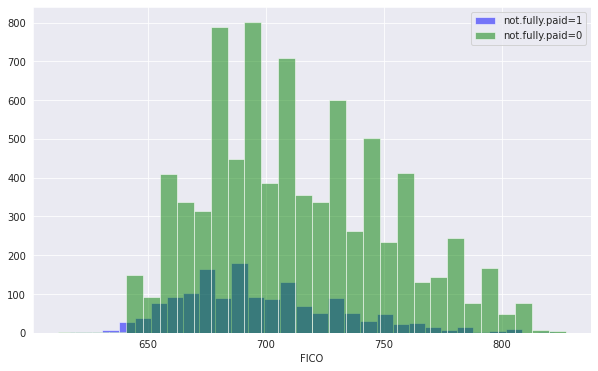

In [ ]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

For the not.fully.paid column.

Text(0.5, 0, 'FICO')

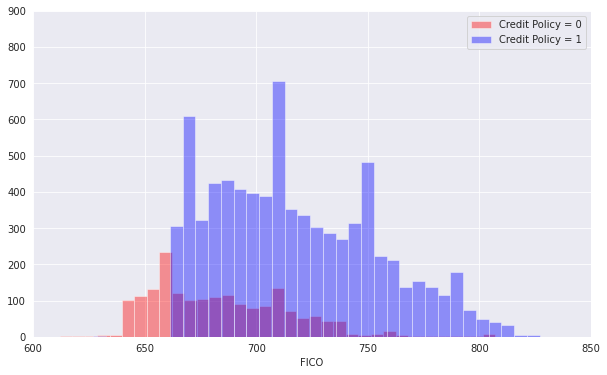

In [ ]:
plt.subplots(figsize = (10,6))
sns.distplot(df[df['credit.policy'] == 0]['fico'], bins = 35, kde = False, color = 'red', label = 'Credit Policy = 0')
sns.distplot(df[df['credit.policy'] == 1]['fico'], bins = 35, kde = False, color = 'blue', label = 'Credit Policy = 1')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 1)
plt.xlabel('FICO')

 For[link text](https://) the not.fully.paid column.

Text(0.5, 0, 'FICO')

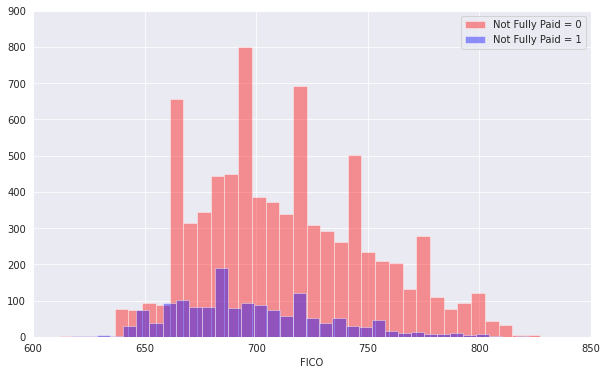

In [ ]:
plt.subplots(figsize = (10,6))
sns.distplot(df[df['not.fully.paid'] == 0]['fico'], bins = 35, kde = False, color = 'red', label = 'Not Fully Paid = 0')
sns.distplot(df[df['not.fully.paid'] == 1]['fico'], bins = 35, kde = False, color = 'blue', label = 'Not Fully Paid = 1')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 1)
plt.xlabel('FICO')

Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**bold text**

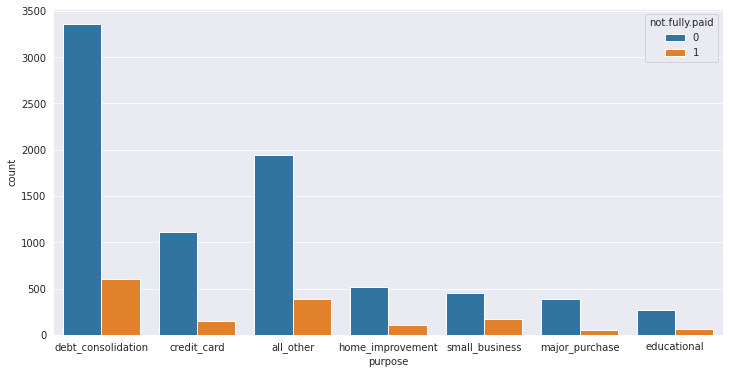

In [ ]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

the trend between FICO score and interest rate

<Figure size 720x432 with 0 Axes>

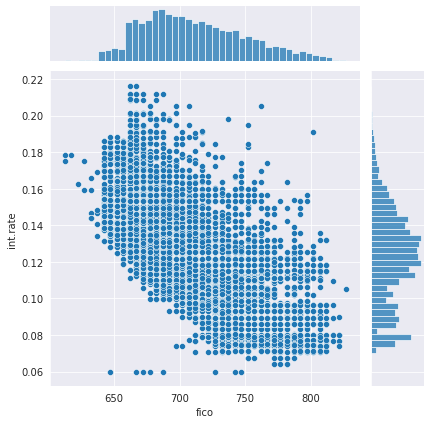

In [ ]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=df)

 differed between not.fully.paid and credit.policy.

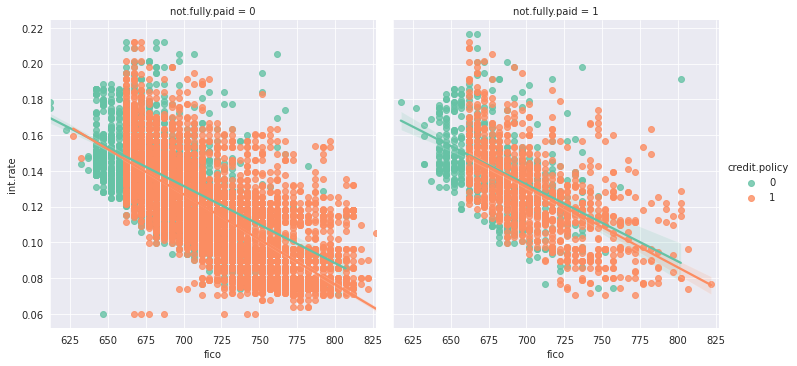

In [ ]:
#understanding the relationship between credit.policy and not.fully.paid
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

the purpose column as categorical, so transform them using dummy variables so sklearn will be able to understand them. 

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
#handling categorical variable purpose
purpose_c = pd.get_dummies(df['purpose'], drop_first=True)
df1 = pd.concat([df, purpose_c], axis=1).drop('purpose', axis=1)
df1.head()

NameError: ignored

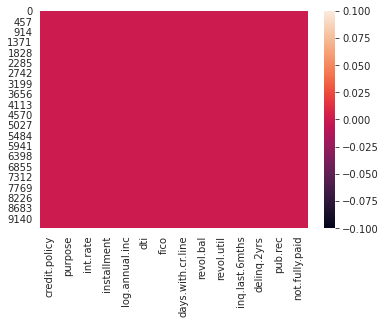

In [ ]:
#checking for null values
sns.heatmap(df.isnull())

In [ ]:
#Splitting the dataset into test and train set
from sklearn.model_selection import train_test_split
y = df1['not.fully.paid'] 
X = df1.drop('not.fully.paid', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
#using KNeighbors Classifier
neigh = DecisionTreeClassifier(criterion="entropy", max_depth=50)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
score = accuracy_score(y_pred, y_test)
score


0.7352122477383438

In [ ]:
X_pred= neigh.predict(X_train)
score = accuracy_score(X_pred, y_train)
score

1.0

In [ ]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
prediction = dtc.predict(X_test)

#checking performance of the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[1977  411]
 [ 373  113]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2388
           1       0.22      0.23      0.22       486

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.73      2874



In [ ]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=800)
rfc.fit(X_train, y_train)
predictionRF = rfc.predict(X_test)

#checking performance of the model
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2388
           1       0.39      0.01      0.03       486

    accuracy                           0.83      2874
   macro avg       0.61      0.50      0.47      2874
weighted avg       0.76      0.83      0.76      2874



 the Confusion Matrix for the predictions

In [ ]:
print(confusion_matrix(y_test,y_predict))


[[2377   11]
 [ 479    7]]


As seen, Random Forest perfoms better than descion tree than KNN